In [1]:
# import necessary libraries
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import researchpy as rp 



In [2]:
# I want instsall pycaret library   
%pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [3]:
# import pycaret classification module  
from pycaret.classification import *    

In [4]:
# load the data 
data=pd.read_csv('ChronicKidneyDisease.csv')

In [5]:
data.head() 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
# dtypes 
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [7]:
# info  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [8]:
#check for missing values   
data.isnull().sum() 

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [9]:
# select numeric data 
num_cols = data.select_dtypes(exclude = 'object')
num_cols.head() 

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6


In [10]:
# summary statistics of numerical variables 
rp.summary_cont(num_cols[['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot','hemo']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,age,391.0,51.4834,17.1697,0.8683,49.7762,53.1905
1,bp,388.0,76.4691,13.6836,0.6947,75.1033,77.8349
2,sg,353.0,1.0174,0.0057,0.0003,1.0168,1.0180
3,al,354.0,1.0169,1.3527,0.0719,0.8756,1.1583
4,su,351.0,0.4501,1.0992,0.0587,0.3348,0.5655
5,bgr,356.0,148.0365,79.2817,4.2019,139.7727,156.3003
6,bu,381.0,57.4257,50.5030,2.5873,52.3384,62.5130
7,sc,383.0,3.0725,5.7411,0.2934,2.4957,3.6493
8,sod,313.0,137.5288,10.4088,0.5883,136.3711,138.6864
9,pot,312.0,4.6272,3.1939,0.1808,4.2715,4.9830


In [11]:
# select categorical data 
cat_cols = data.select_dtypes(include = 'object')
cat_cols.head() 

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


In [12]:
cat_cols.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [13]:
# summary statistics of categorical variables 
rp.summary_cat(cat_cols[['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad','appet', 'pe', 'ane', 'classification']])

,Variable,Outcome,Count,Percent
0,rbc,normal,201,81.05
1,,abnormal,47,18.95
2,pc,normal,259,77.31
3,,abnormal,76,22.69
4,pcc,notpresent,354,89.39
...,...,...,...,...
207,ane,no,339,84.96
208,,yes,60,15.04
209,classification,ckd,248,62.00
210,,notckd,150,37.50


In [14]:
# correlation matrix by using pearson method    
correlation = num_cols.corr(method = 'pearson')   


In [15]:
correlation

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,-0.268683,0.364251,-0.092347,0.640298
age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
bp,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
sg,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
al,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
su,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
bgr,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
bu,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
sc,-0.268683,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sod,0.364251,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183


In [16]:
# skewness of numerical variables   
num_cols.skew()

id       0.000000
age     -0.668259
bp       1.605429
sg      -0.172444
al       0.998157
su       2.464262
bgr      2.010773
bu       2.634374
sc       7.509538
sod     -6.996569
pot     11.582956
hemo    -0.335095
dtype: float64

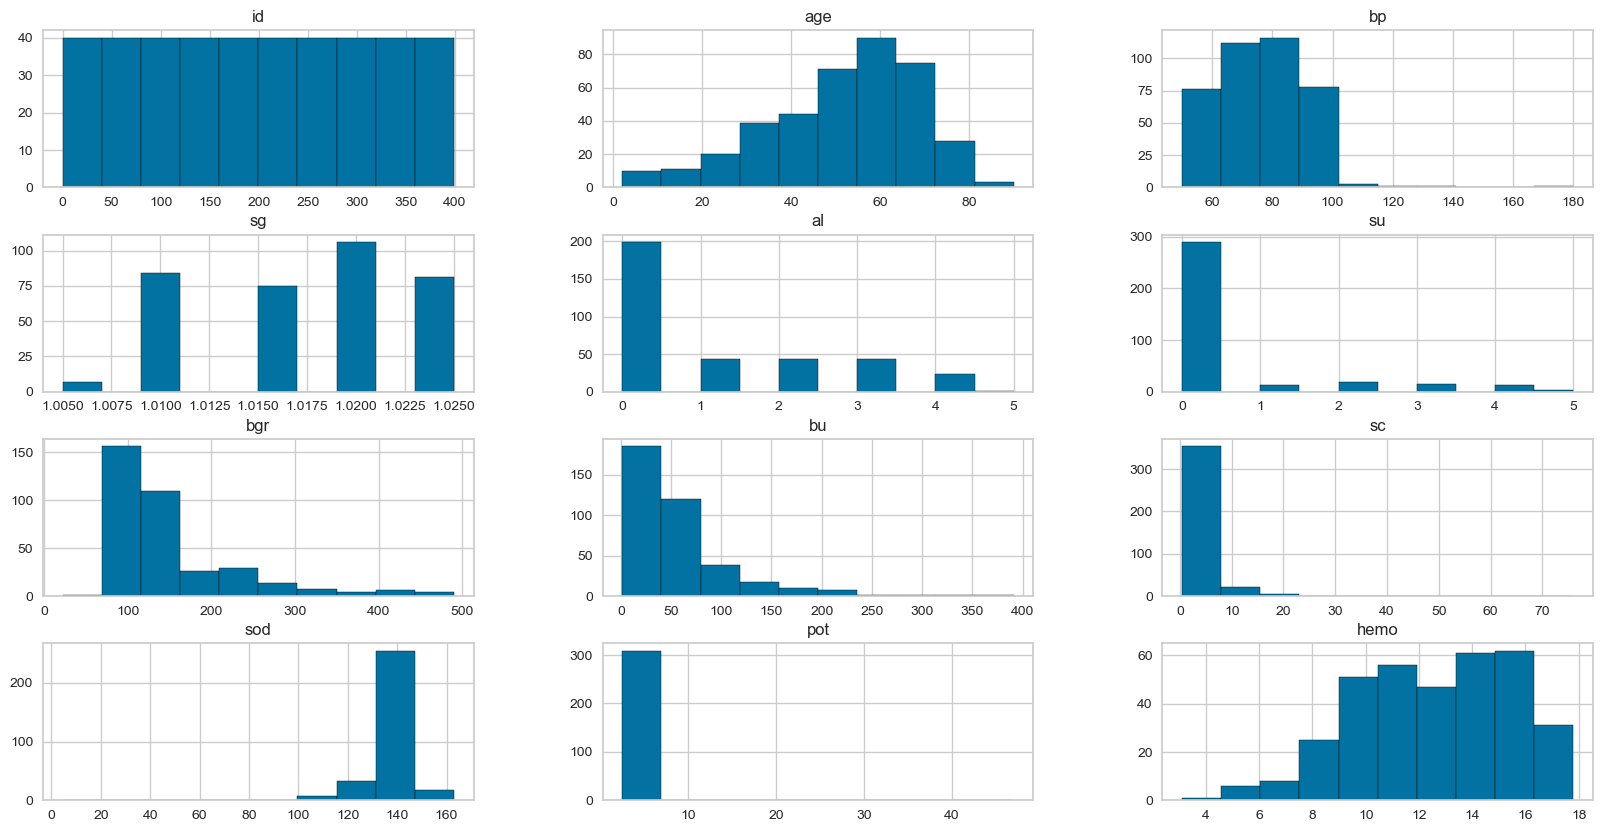

In [17]:
 # Univariate distributions with histogram
data.select_dtypes(exclude = "object").hist(figsize=(20,10), edgecolor='black')
plt.show() 

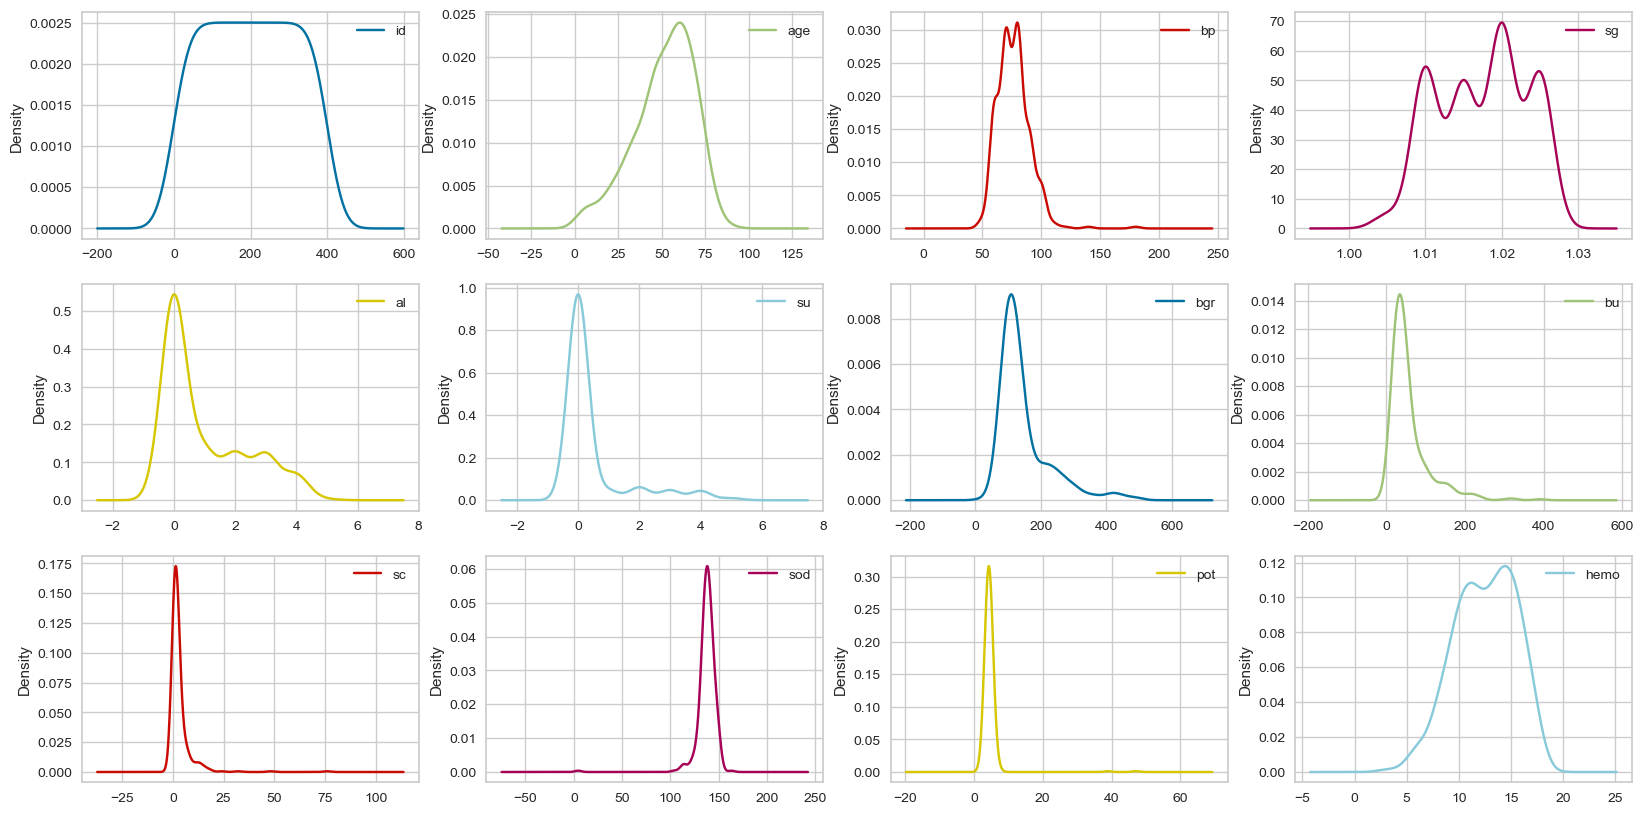

In [18]:
# Univariate distributions with density plot 
data.select_dtypes(exclude = "object").plot(kind='density', subplots=True, sharex=False, figsize=(20,10), layout=(3,4))
plt.show() 

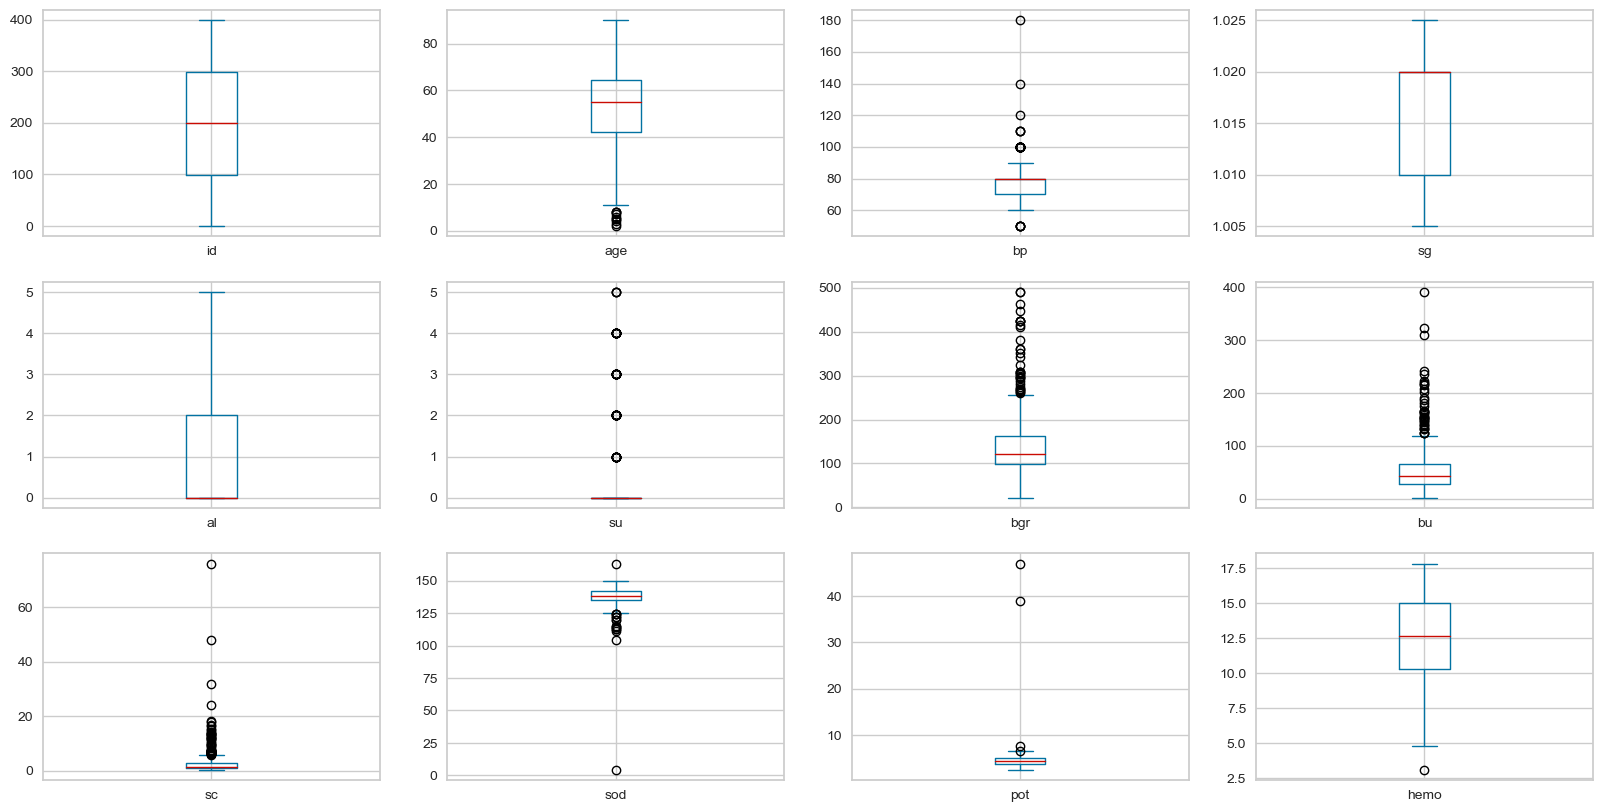

In [19]:
# Univariate distributions with box plots 
data.select_dtypes(exclude = "object").plot(kind='box', subplots=True, sharex=False, figsize=(20,10), layout=(3,4))
plt.show()

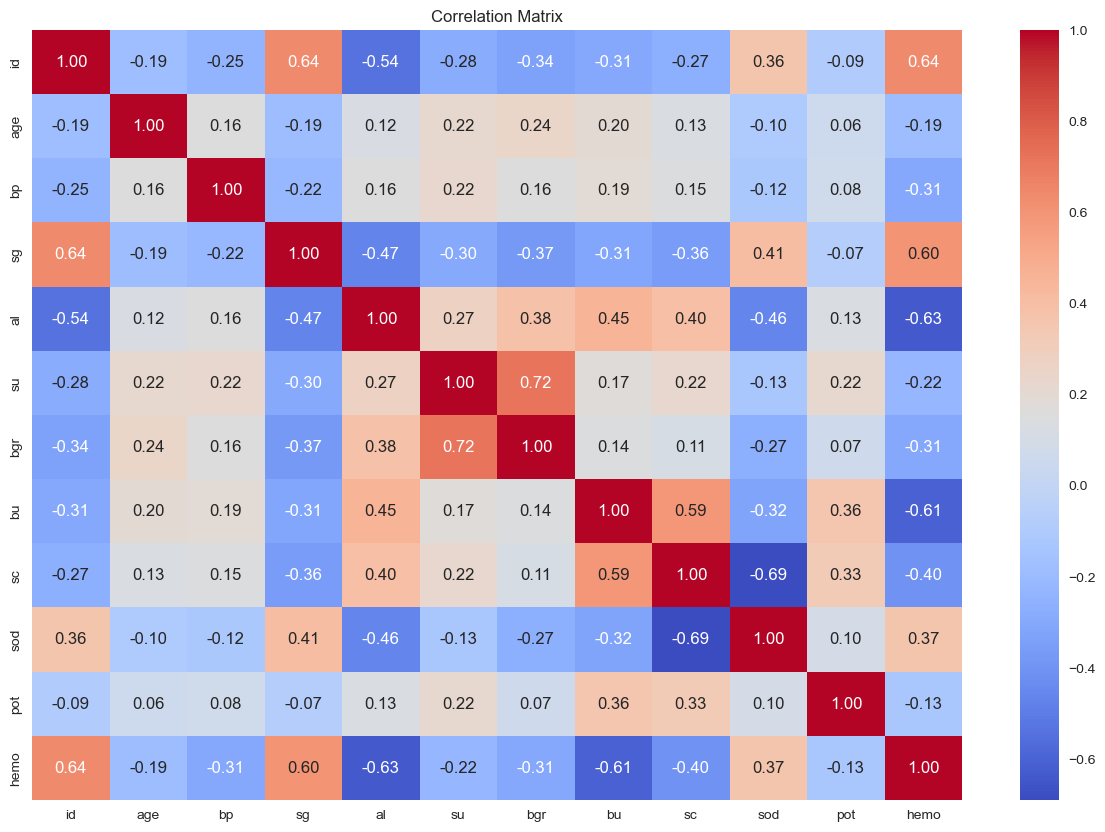

In [20]:
# Multivariate plots with correlations 
plt.figure(figsize=(15,10)) 
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")    
plt.title('Correlation Matrix')
plt.show()


In [21]:
# exmine first few rows of data 
data.head() 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [22]:
# drop the 'id' column  
data.drop('id', axis=1, inplace=True)   


In [23]:
data.head() 


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [24]:
# change the data type of 'classification' column to category   
data['classification'] = data['classification'].astype('category')  

In [26]:
# check the data type of 'classification' column    
data['classification'].dtype    

CategoricalDtype(categories=['ckd', 'ckd\t', 'notckd'], ordered=False)

In [25]:
# check the unique values of 'classification' column    
data['classification'].unique() 

['ckd', 'ckd\t', 'notckd']
Categories (3, object): ['ckd', 'ckd\t', 'notckd']

In [27]:
# remove the ckd\t from classification column   
data['classification'] = data['classification'].str.replace('ckd\t', 'ckd') 

In [28]:
# check the unique values of 'classification' column    
data['classification'].unique() 

array(['ckd', 'notckd'], dtype=object)

In [29]:
# give value 1 to ckd and 0 to notckd in classification column      
data['classification'] = data['classification'].map({'ckd':1, 'notckd':0})  

In [30]:
# check the unique values of 'classification' column    
data['classification'].unique() 

array([1, 0], dtype=int64)

In [31]:
# run machine learning model with pycaret library   
reg = setup(data, target = 'classification', session_id = 123)  

,Description,Value
0,Session id,123
1,Target,classification
2,Target type,Binary
3,Original data shape,"(400, 25)"
4,Transformed data shape,"(400, 31)"
5,Transformed train set shape,"(280, 31)"
6,Transformed test set shape,"(120, 31)"
7,Numeric features,11
8,Categorical features,13
9,Rows with missing values,60.5%


In [54]:
# compare the performance of different models   
best_model= compare_models()        

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9964,1.0000,0.9944,1.0000,0.9971,0.9924,0.9927,0.0420
lightgbm,Light Gradient Boosting Machine,0.9893,0.9978,0.9889,0.9944,0.9914,0.9772,0.9780,0.0730
rf,Random Forest Classifier,0.9857,0.9989,0.9886,0.9889,0.9884,0.9698,0.9709,0.0530
et,Extra Trees Classifier,0.9857,0.9995,0.9882,0.9889,0.9882,0.9700,0.9711,0.0490
gbc,Gradient Boosting Classifier,0.9786,0.9989,0.9833,0.9839,0.9828,0.9544,0.9569,0.0460
xgboost,Extreme Gradient Boosting,0.9786,0.9995,0.9889,0.9789,0.9832,0.9538,0.9564,0.0370
lr,Logistic Regression,0.9679,0.9967,0.9775,0.9722,0.9743,0.9314,0.9333,0.7610
dt,Decision Tree Classifier,0.9679,0.9660,0.9775,0.9734,0.9744,0.9313,0.9346,0.0270
qda,Quadratic Discriminant Analysis,0.9679,1.0000,0.9484,1.0000,0.9727,0.9337,0.9376,0.0280
nb,Naive Bayes,0.9607,0.9983,0.9369,1.0000,0.9666,0.9191,0.9239,0.0270


In [32]:
# create a model    
ada = create_model('ada')   

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9643,1.0000,0.9444,1.0000,0.9714,0.9239,0.9266


In [33]:
# tune the model    
tuned_ada = tune_model(ada) 


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9643,1.0000,1.0000,0.9444,0.9714,0.9239,0.9266
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9643,1.0000,0.9444,1.0000,0.9714,0.9239,0.9266
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9643,1.0000,0.9444,1.0000,0.9714,0.9239,0.9266


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [34]:
# evaluate the model    
evaluate_model(tuned_ada)   


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

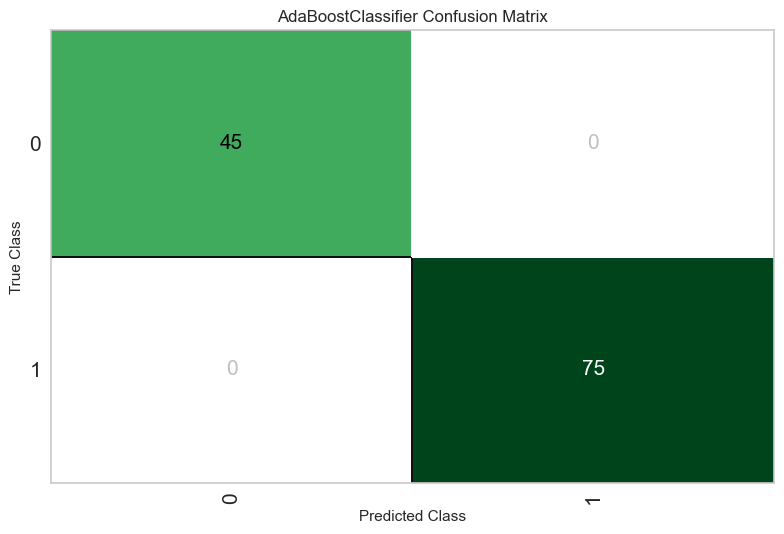

In [36]:
# confusion matrix  
plot_model(tuned_ada, plot = 'confusion_matrix')

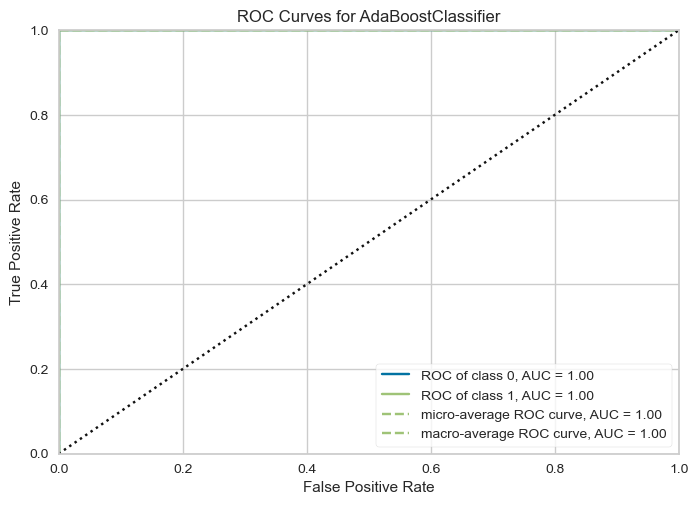

In [37]:
# plot roc curve    
plot_model(tuned_ada,  plot = 'auc')

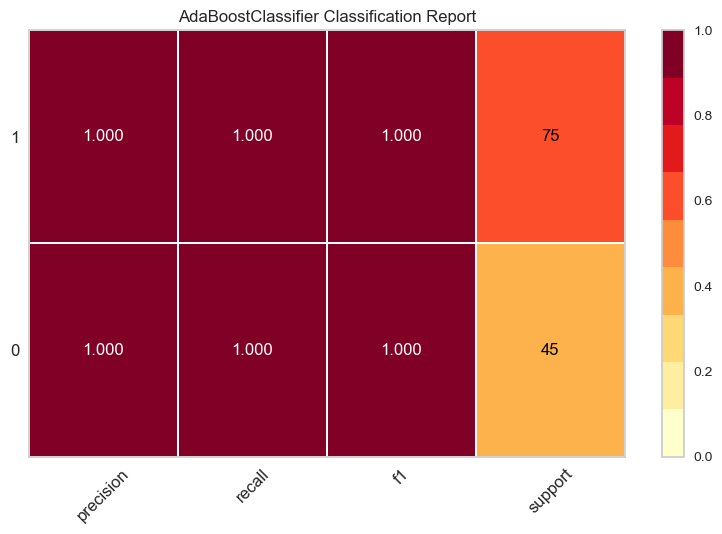

In [38]:
# plot classification report    
plot_model(tuned_ada, plot = 'class_report')    

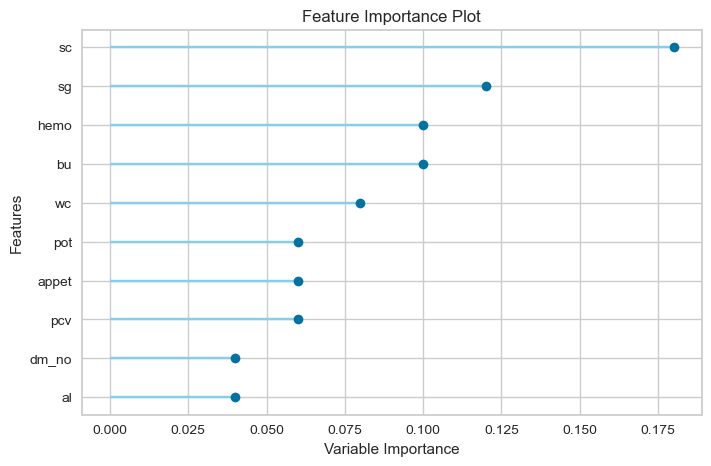

In [39]:
# plot feature importance   
plot_model(tuned_ada, plot = 'feature') 

In [40]:
# predict the model 
predict_model(tuned_ada)    

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,rc,htn,dm,cad,appet,pe,ane,classification,prediction_label,prediction_score
356,34.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,87.0,...,6.1,no,no,no,good,no,no,0,0,0.9073
124,65.0,100.0,1.015,0.0,0.0,NaN,normal,notpresent,notpresent,90.0,...,3.6,yes,no,no,good,no,no,1,1,0.9914
225,60.0,90.0,1.010,3.0,5.0,abnormal,normal,notpresent,present,490.0,...,4.5,yes,yes,no,good,no,no,1,1,0.9994
50,53.0,60.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,91.0,...,3.8,yes,yes,no,poor,yes,yes,1,1,0.9987
257,38.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,91.0,...,5.8,no,no,no,good,no,no,0,0,0.9316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,53.0,100.0,1.010,1.0,3.0,abnormal,normal,notpresent,notpresent,213.0,...,NaN,no,yes,no,good,no,no,1,1,0.9906
277,46.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,123.0,...,4.8,no,no,no,good,no,no,0,0,0.9481
210,59.0,100.0,1.015,4.0,2.0,normal,normal,notpresent,notpresent,255.0,...,3.9,yes,yes,yes,good,no,yes,1,1,0.9994
153,55.0,90.0,1.010,2.0,1.0,abnormal,abnormal,notpresent,notpresent,273.0,...,2.9,yes,yes,no,poor,yes,yes,1,1,1.0000


In [41]:
# finalize the model    
final_ada = finalize_model(tuned_ada)   

In [42]:
final_ada   

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'bp', 'sg', 'al', 'su',
                                             'bgr', 'bu', 'sc', 'sod', 'pot',
                                             'hemo'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exc...
                 TransformerWrapper(exclude=None, include=['pcv', 'wc', 'rc'],
                                    transformer=TargetEncoder(cols=['pcv', 'wc',
                                                                    'rc'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              hierarchy=None,
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              smoothing=10,
                                                              verbose=0))),
                ('actual_estimator',
                 AdaBoostClassifier(algorithm='SAMME.R', estimator=None,
                                    learning_rate=1.0, n_estimators=50,
                                    random_state=123))],
         verbose=False)

In [43]:
# save the model    
save_model(final_ada, 'final_ada_model')    

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'bp', 'sg', 'al', 'su',
                                              'bgr', 'bu', 'sc', 'sod', 'pot',
                                              'hemo'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exc...
                  TransformerWrapper(exclude=None, include=['pcv', 'wc', 'rc'],


In [44]:
# load the model    
loaded_model = load_model('final_ada_model')    

Transformation Pipeline and Model Successfully Loaded
